In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import scipy.stats as st

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
df = pd.read_csv("final_df-Copy1.csv",index_col=0)
df.head()

,Player,FG%,3P%,2P%,FT%,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,POS,height,weight
0,A.C. Green,0.442,0.062,0.448,0.675,1.890,3.722,5.615,0.865,0.633,0.202,0.602,1.572,5.440,PF,203.0,106.0
1,A.J. Guyton,0.384,0.382,0.381,0.824,0.285,0.750,1.035,1.870,0.245,0.155,0.775,0.785,5.710,PG,208.0,99.0
2,A.J. Hammons,0.405,0.500,0.375,0.450,0.360,1.270,1.640,0.180,0.050,0.590,0.450,0.950,2.180,C,198.0,99.0
3,A.J. Price,0.373,0.273,0.447,0.632,0.251,1.093,1.344,1.971,0.401,0.021,0.753,0.735,5.578,PG,213.0,124.0
4,Aaron Brooks,0.410,0.359,0.444,0.838,0.403,1.268,1.671,3.174,0.591,0.134,1.582,1.932,9.604,PG,183.0,73.0


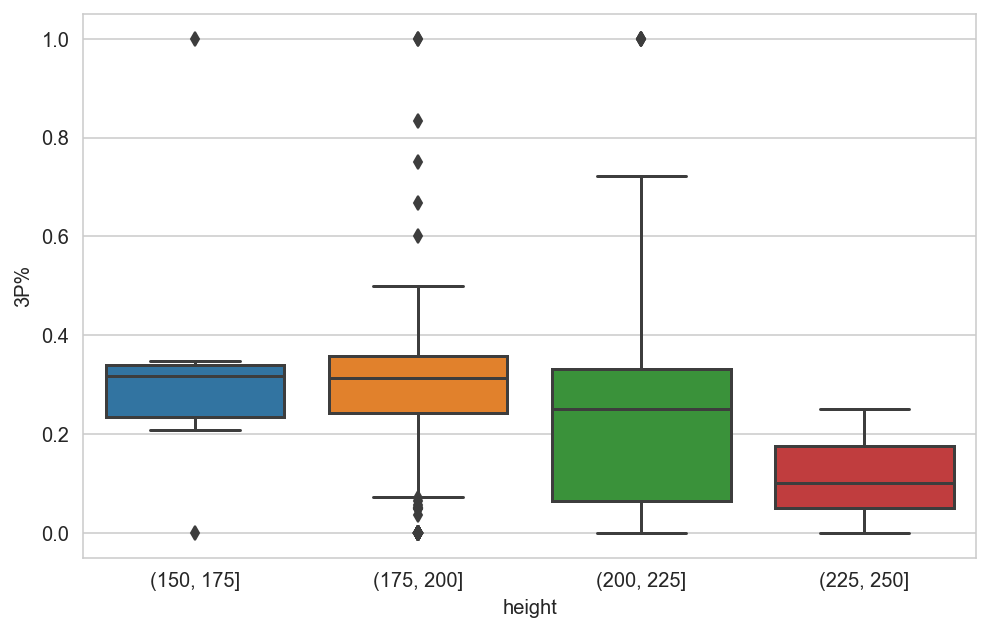

In [3]:

height = pd.cut(df.height, range(150, 275, 25))

x = height
y = df["3P%"]
fig = plt.figure(figsize=(8,5))
sns.boxplot( x, y,)
plt.show()



In [4]:
short_players = df.loc[df['height'] < 200]
tall_players = df.loc[df['height'] > 200]

sh_pl_h = short_players.height
sh_pl_3p = round(short_players['3P%'],3)

tall_pl_h = tall_players.height
tall_pl_3p = round(tall_players['3P%'],3)

print(len(short_players))
print(len(tall_players))

724
834


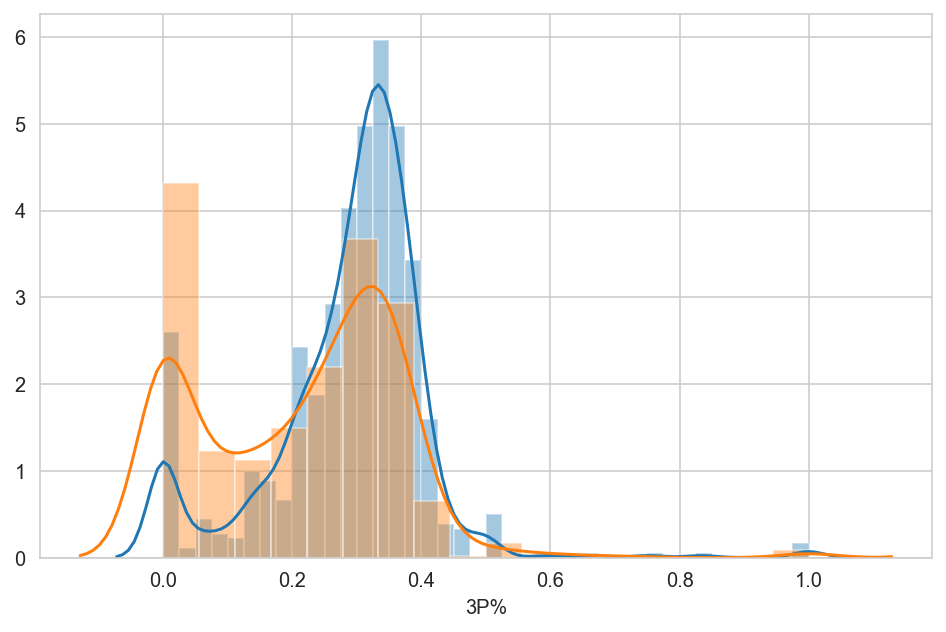

In [5]:
fig = plt.figure(figsize=(8,5))
sns.distplot(sh_pl_3p)
sns.distplot(tall_pl_3p)

Since our dataset is non-normal, that means we'll need to use the Central Limit Theorem.

In [6]:
#A function to get a random sample of our data with the sample size of n
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
        
    return sample

test_sample = get_sample(tall_pl_3p, 70)
print(test_sample[:10])

[0.0, 0.28, 0.29, 0.212, 0.0, 0.324, 0.181, 0.365, 0.24, 0.368]


In [7]:
#Function to return sample mean
def get_sample_mean(sample):
    return round(sum(sample)/len(sample),3)

test_mean = get_sample_mean(test_sample)
test_mean

0.224

esc + m + enter

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sample distribution of sample means!

In [8]:
#dist_size = the number of samples we want to create and n = sample size
def get_sample_dist(data, dist_size, n):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    return sample_dist

test_samp_dist = get_sample_dist(sh_pl_3p, 50, 50)
test_samp_dist[:5]

[0.289, 0.296, 0.278, 0.28, 0.313]

# Visualizations of Sample Distributions


We will create sample distributions for 3P% of both short players and tall players

In [55]:
dist_size = 30
sample_size = 60
short_dist = get_sample_dist(sh_pl_3p, dist_size, sample_size)
tall_dist = get_sample_dist(tall_pl_3p, dist_size, sample_size)

In [56]:
print(short_dist[:10])
print(tall_dist[:10])

[0.299, 0.304, 0.32, 0.294, 0.288, 0.292, 0.278, 0.313, 0.285, 0.275]
[0.224, 0.191, 0.221, 0.249, 0.209, 0.229, 0.208, 0.235, 0.225, 0.189]


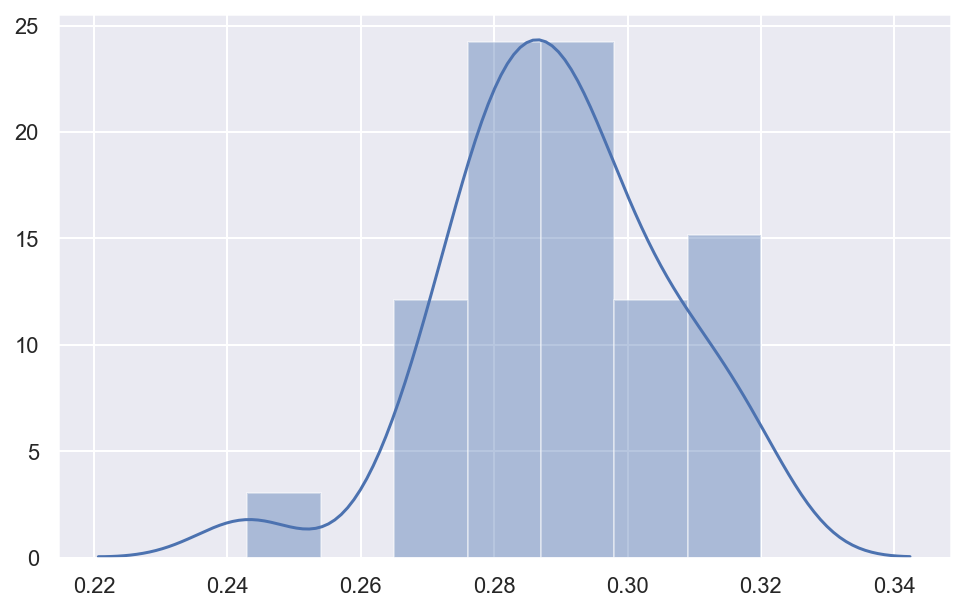

In [57]:
fig = plt.figure(figsize=(8,5))
sns.distplot(short_dist)


In [58]:
st.normaltest(short_dist)


NormaltestResult(statistic=2.250144729764838, pvalue=0.3246289747707517)

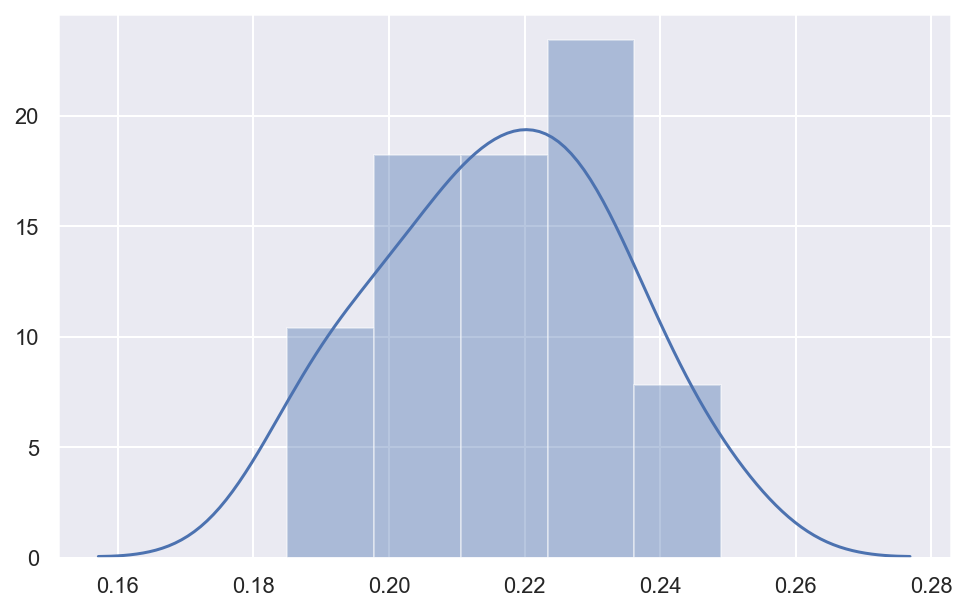

In [59]:
fig = plt.figure(figsize=(8,5))
sns.distplot(tall_dist)

In [60]:
st.normaltest(tall_dist)

NormaltestResult(statistic=0.8412402725152539, pvalue=0.6566394875729311)

It is always a good idea to create a plot of the probability distributions for samples to visually inspect the differences present between mean and standard deviation. Plot both samples' distributions and inspect the overlap using seaborn to get an idea of how different the samples might be from one another.

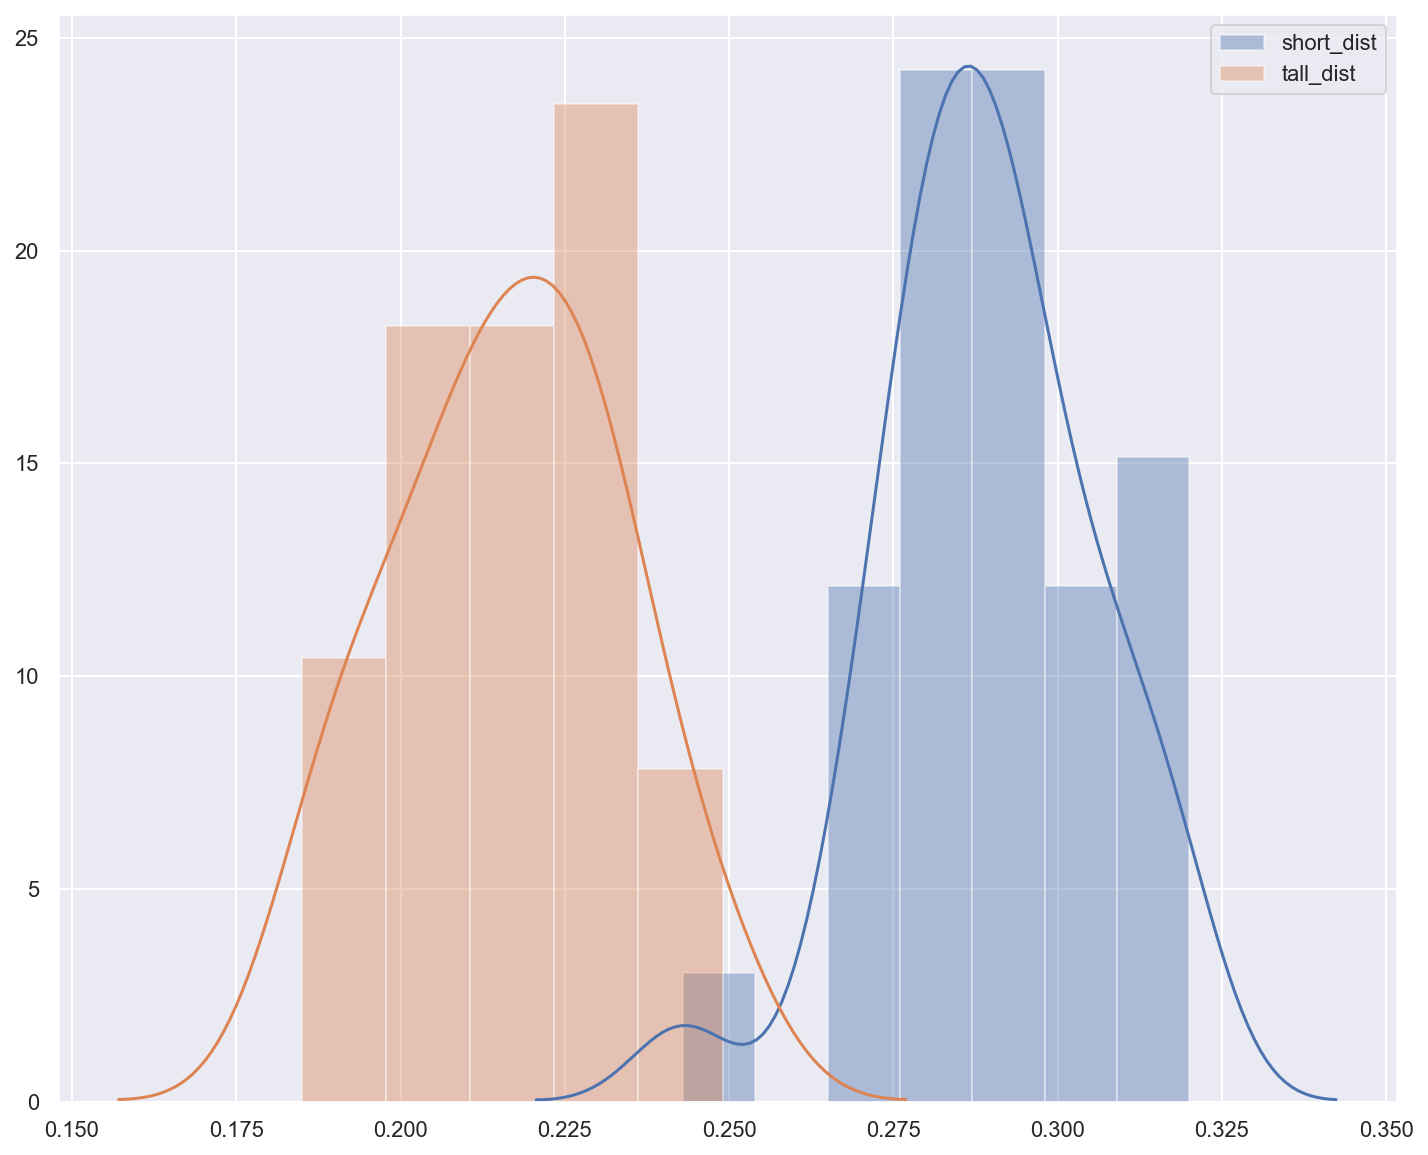

In [61]:
# Create a plot showing overlapping of distribution means and sds for inspection
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(short_dist, label="short_dist")
sns.distplot(tall_dist, label="tall_dist")
plt.legend()
plt.show()

1) Set up null and alternative hypotheses   
2) Choose a significance level   
3) Calculate the test statistic   
4) Determine the critical or p-value (find the rejection region)   
5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis 

## The Null Hypothesis

In thus drug efficacy experiment example, you can define the null hypothesis to be that there is no difference between a subject taking a placebo and the treatment drug.

>**$H_{0}$: The mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is zero. i.e. $\mu_{0} = \mu_{1}$**

## The Alternate Hypothesis

In this example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups.

>**$H_{1}$ (2-tailed): The parameter of interest, our mean difference between short peoples' 3 point shooting percentage and tall players' 3 point shooting percentage, is different than zero.**

>**$H_{1}$ (1-tailed, >): TThe mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is greater than zero.**

>**$H_{1}$ (1-tailed, <): The mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an inference about this population parameter.

Now, calculate the mean difference between both groups.

In [62]:
mean_diff = round(np.mean(short_dist) - np.mean(tall_dist), 3)
mean_diff

0.073

# Calculating pooled sample variance

In [63]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [64]:
def pooled_variance(sample1, sample2):
    n_1 = len(sample1)
    n_2 = len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    pool_var = ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)
                
    return pool_var

In [65]:
def twosample_tstatistic(dist_1, dist_2):
    dist_1_mean, dist_2_mean = np.mean(dist_1), np.mean(dist_2)
    
    pool_var = pooled_variance(dist_1, dist_2)
    
    n_dist1, n_dist2 = len(dist_1), len(dist_2)
    
    num = dist_1_mean - dist_2_mean
    denom = np.sqrt(pool_var * ((1/n_dist1)+(1/n_dist2)))
    return num / denom


In [66]:
twosample_tstatistic(short_dist,tall_dist)

16.675592763598193

In [88]:
def visualize_t(t_stat, n_dist1, n_dist1):
    
#     """
#     Visualize the critical t values on a t distribution
    
#     Parameters
#     -----------
#     t-stat: float
#     n_control: int
#     n_experiment: int
    
#     Returns
#     ----------
#     None
    
#     """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = st.t.ppf(1-0.025, (n_dist1+n_dist1-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= st.t.pdf(xs, (n_dist1+n_dist1-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')
    
    ax.axvline(t_stat, color='red', linestyle='--', lw=5,label='t-statistic')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    plt.show()
    return None

In [89]:
t_players = twosample_tstatistic((short_dist), tall_dist)
t_players

16.675592763598193

In [94]:
n_short = len(short_dist)
n_tall = len(tall_dist)

dof = (n_short + n_tall - 2)
alpha = 0.1
t_crit = st.t.ppf(1-0.025, dof)

In [92]:
result  = st.ttest_ind(short_dist, tall_dist)
result

Ttest_indResult(statistic=16.675592763598193, pvalue=8.525915028246105e-24)

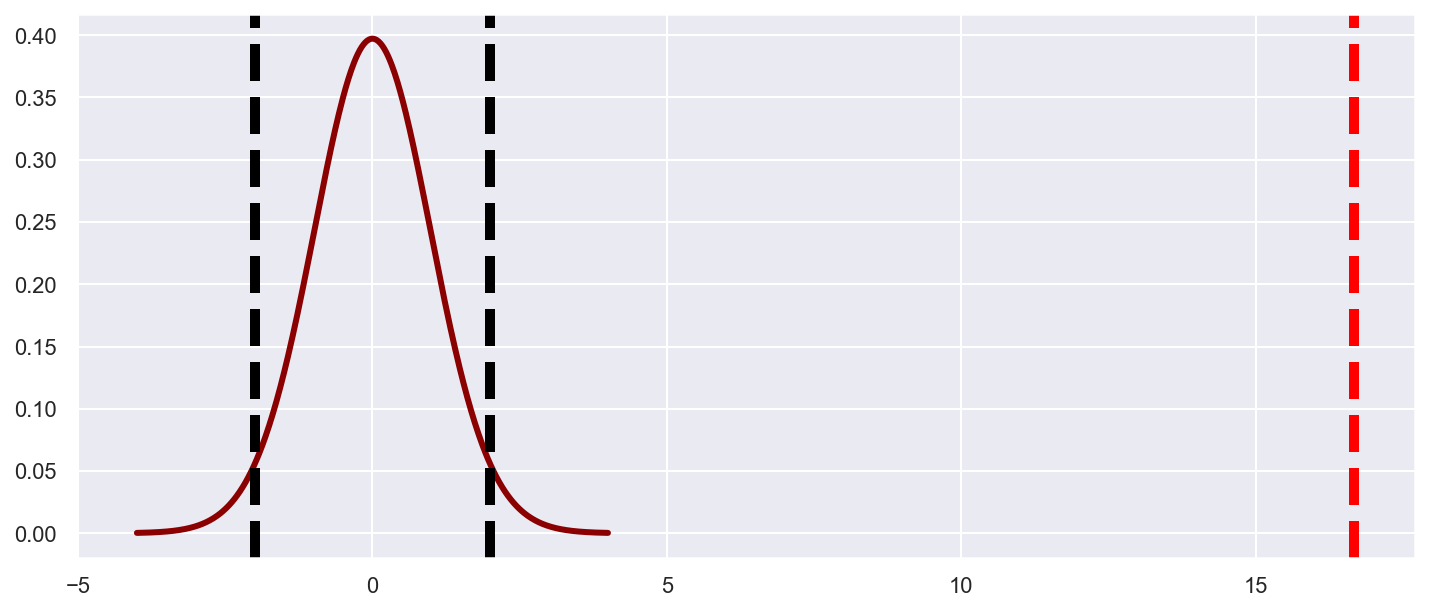

In [93]:
visualize_t(result[0],len(short_dist),len(tall_dist))

In [99]:
if (result[0]>t_crit) and (result[1]<alpha):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(result[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((result[1]), 10))
else:
    print ("Null hypothesis is True with t-value =", 
                round(result[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((result[1]), 10))
    

Null hypothesis rejected. Results are statistically significant with t-value = 16.68 critical t-value = 2.0017174830120923 and p-value = 0.0


Ttest_indResult(statistic=16.675592763598193, pvalue=8.525915028246105e-24)